In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
scaler = StandardScaler()

In [3]:
df = pd.read_csv("datasets/15/countries of the world.csv")
df = df[df["Region"].str.contains("EUROPE")].drop("Region", axis=1)
df.fillna(0, inplace=True)
df.shape

(40, 19)

In [148]:
objCols = list(df.drop("Country", axis=1).select_dtypes(["object"]).columns)

In [149]:
for i in objCols:
    df[i] = df[i].apply(lambda x: str(x).replace(",", "."))
    df[i] = pd.to_numeric(df[i])

In [150]:
X = df.drop("Country", axis=1)
y = df["Country"]

In [151]:
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [152]:
X_scaled.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-0.468452,-0.613138,-0.222189,-0.392314,-2.333290,2.632930,-1.668820,0.205639,-2.146423,0.024897,0.959232,-0.021598,0.493691,2.135923,-1.806244,2.843737,-0.440215,-0.130866
1,-0.644809,-0.799947,-0.211509,-0.421004,1.476905,-0.560716,-0.276136,0.549219,-0.013469,-1.261360,-0.701158,1.178933,0.493691,-0.670751,-1.358648,-0.893148,-2.018861,-2.710313
2,-0.236795,-0.249018,-0.232636,-0.421004,-0.043208,-0.449204,0.780383,0.498318,-0.238781,-0.260029,-0.378096,0.377376,0.493691,-0.657595,0.166653,-0.603217,0.533842,0.310180
3,-0.126966,-0.601379,-0.138533,-0.415994,-0.297661,-0.445547,0.693941,0.498318,-0.186709,0.174176,-0.550897,0.072733,0.493691,0.061615,0.388278,-0.732075,-0.003569,0.626485
4,-0.422368,-0.465295,-0.236403,-0.420093,-0.601684,2.547010,-1.515144,-1.995817,-1.424423,-0.485652,0.410778,0.439748,1.225086,-0.644439,-0.480839,1.394084,0.567431,-0.260061


# Linkage
Кластеризация европейских стран по соц-демократическим показателям

In [153]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [154]:
Z = linkage(X, method="average", metric="euclidean")

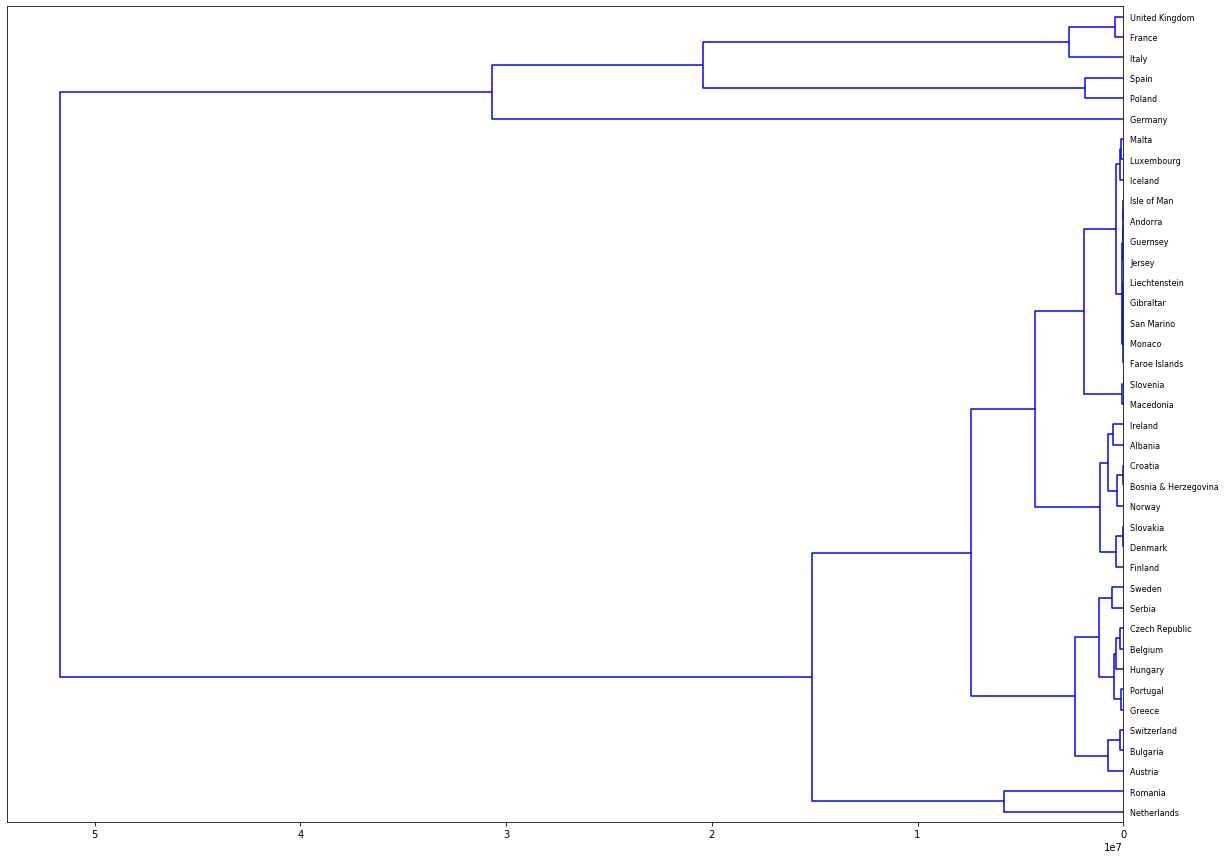

In [156]:
plt.figure(figsize=(20,15))
dend = dendrogram(Z, orientation="left", color_threshold=0, labels=df["Country"].values)
plt.show()

In [167]:
# Исходя из диаграмы определяем подходую дистанцию APPR_DIST
APPR_DIST = 0.5
labels = fcluster(Z, APPR_DIST)
np.unique(labels)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int32)

In [169]:
df.loc[:, 'label'] = labels

In [171]:
for i, group in df.groupby("label"):
    print("=" * 10)
    print("cluster {}".format(i))
    print(group)

cluster 1
          Country  Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
146  Netherlands     16491461           41526                       397.1   
168      Romania     22303552          237500                        93.9   

     Coastline (coast/area ratio)  Net migration  \
146                          1.09           2.91   
168                          0.09          -0.13   

     Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
146                                5.04             28600.0          99.0   
168                               26.43              7000.0          98.4   

     Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
146              460.8       26.71       0.97      72.32        3       10.9   
168              196.9       40.82       2.25      56.93        3       10.7   

     Deathrate  Agriculture  Industry  Service  label  
146       8.68        0.021     0.244    0.736      1  
168      11.77  

# DBSCAN
Кластеризация абонентов сотовой связи по координатам

In [198]:
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")

import seaborn as sns
from sklearn.cluster import DBSCAN
from mpl_toolkits.basemap import Basemap

In [206]:
df.head()

,lac,cid,msisdn,imei,event_type,tstamp,long,lat,max_dist,cell_type,start_angle,end_angle
0,5029,40798,158529599791,3.531111e+14,0,1369252800974,37.9305,55.7815,2101,OUTDOOR,220.0,280.0
1,7782,56870,158520145943,1.292900e+13,5,1369252801396,37.4239,55.7426,2,OUTDOOR,45.0,105.0
2,7794,32226,158521798391,3.519940e+14,5,1369252802013,37.7034,55.5803,1125,OUTDOOR,0.0,60.0
3,7758,33528,158537830573,3.586270e+14,0,1369252802331,37.7895,55.7042,1158,OUTDOOR,210.0,270.0
4,5060,17568,158510204039,3.524581e+14,8,1369252803586,37.1900,55.8308,500,OUTDOOR,180.0,240.0


In [4]:
df = pd.read_csv("datasets/15/gps_data.csv", sep=";")
df = df[df["event_type"]==0][["msisdn", "long", "lat"]]
df.shape

(77847, 3)

In [247]:
lat = df['lat'].values
lon = df['long'].values
population = df['msisdn'].values

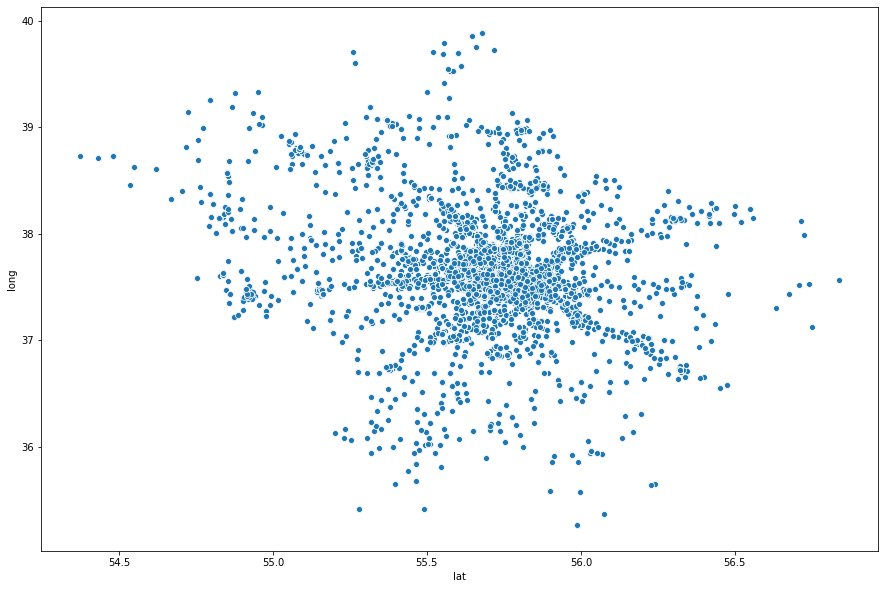

In [317]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="lat", y="long", data=df_geo)
plt.show()

In [248]:
df_geo = df[["lat", "long"]]

In [249]:
km_in_radian = 6371.0088

In [250]:
X = np.radians(df_geo.values)

In [251]:
from sklearn.neighbors import NearestNeighbors

In [252]:
model = NearestNeighbors(n_neighbors=20, metric="haversine", algorithm="ball_tree")
model.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='haversine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [274]:
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)

In [275]:
dist.shape

(77847, 20)

In [276]:
dist = dist[:,-1]
dist = np.sort(dist)

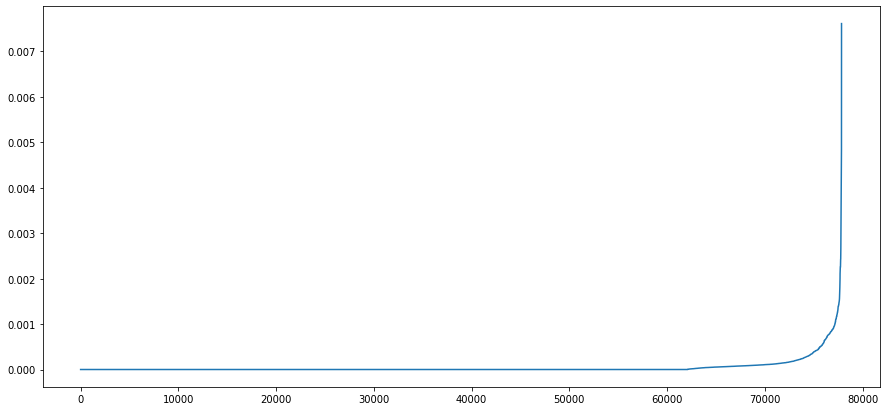

In [279]:
plt.figure(figsize=(15,7))
plt.plot(dist)
plt.show()

In [286]:
# Из графика видно, что при значении 0.0005 растояние кластеров резко увеличивается
EPS = 0.0005

In [288]:
est = DBSCAN(eps=EPS, metric="haversine", algorithm="ball_tree", min_samples=20)
est.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.0005, leaf_size=30, metric='haversine',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [289]:
clusters = est.labels_

In [292]:
pd.Series(clusters).value_counts()

 0     68257
-1      1904
 4       859
 46      820
 7       273
 64      262
 8       244
 19      237
 21      201
 30      190
 1       178
 51      164
 38      156
 25      156
 44      132
 14      126
 11      113
 72      109
 76      108
 74      108
 18      102
 3        94
 9        93
 47       90
 49       90
 5        88
 88       86
 42       86
 20       72
 12       72
       ...  
 31       33
 45       31
 59       31
 48       29
 65       28
 83       28
 61       27
 80       27
 81       27
 26       26
 36       26
 86       26
 10       25
 70       25
 84       24
 92       24
 56       24
 24       23
 15       23
 79       23
 85       23
 33       23
 53       21
 77       21
 16       21
 82       21
 34       20
 87       20
 67       20
 66       20
Length: 94, dtype: int64

In [294]:
df_geo["clusters"] = clusters

In [295]:
df_geo.head()

,lat,long,clusters
0,55.7815,37.9305,0
3,55.7042,37.7895,0
6,55.7445,37.5660,0
7,55.7793,37.9052,0
9,55.9318,37.8095,0


In [314]:
df_geo_clean = df_geo[~df_geo["clusters"].isin([-1,0])]

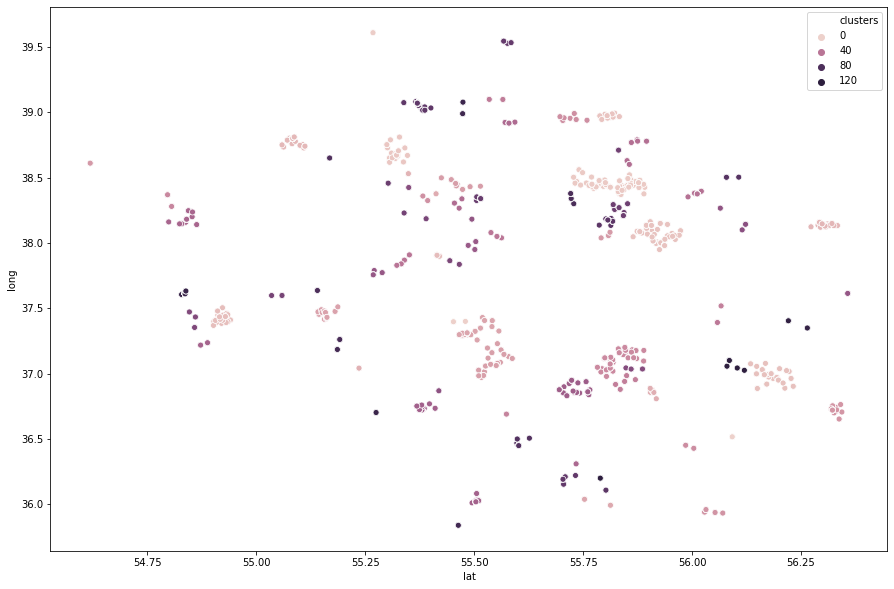

In [315]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="lat", y="long", hue="clusters", data=df_geo_clean)